# Question 1:
## Here we are working with the automobile dataset of UCI repository and we will predict price of cars using some numeric and nominal attributes.

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt 

In [2]:
vehicle = pd.read_csv("Vehicles.csv")

In [3]:
vehicle.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


 Here I saw some values are missing and has "?" instead so I first replaced them with NaN because then it will be easy to
 see and work on the data as otherwise I can't see which values are missing clearly.

In [4]:
vehicle = vehicle.replace('?',np.nan)
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

 Then Dropped below the rows that had the price values missing as replacing the price values with mean or median or any other
 values will not work appropriately.

In [5]:
vehicle.dropna(subset=['price'], axis=0,inplace=True)

In [6]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

 Replacing the missing values of the column "normalized-losses" with the mean as it seems to be useful and to fit nicely.

In [7]:
vehicle['normalized-losses'] = vehicle['normalized-losses'].astype(float, errors = 'raise')
mean = vehicle['normalized-losses'].mean()
vehicle['normalized-losses'] = vehicle['normalized-losses'].replace(np.nan,mean)

Replacing the "num-of-doors" with appropriate numeric value

In [8]:
vehicle['num-of-doors'] = vehicle['num-of-doors'].replace("two",2)
vehicle['num-of-doors'] = vehicle['num-of-doors'].replace("four",4)
mode =float( vehicle['num-of-doors'].mode())
vehicle['num-of-doors'] = vehicle['num-of-doors'].replace(np.nan,mode)

Now made the "fuel-type","aspiration" attributes to 0,1 dummy values as these are boolean attributes so just converted them to numeric boolean representation.

In [9]:
vehicle['fuel-type'] = vehicle['fuel-type'].replace("diesel",1)
vehicle['fuel-type'] = vehicle['fuel-type'].replace("gas",0)

In [10]:
vehicle['aspiration'] = vehicle['aspiration'].replace("std",0)
vehicle['aspiration'] = vehicle['aspiration'].replace("turbo",1)

Replacing the body style attribute with numeric as the price seems sensitive to this.

In [11]:
vehicle['body-style'] = vehicle['body-style'].replace("hardtop",1)
vehicle['body-style'] = vehicle['body-style'].replace("wagon",2)
vehicle['body-style'] = vehicle['body-style'].replace("sedan",3)
vehicle['body-style'] = vehicle['body-style'].replace("hatchback",4)
vehicle['body-style'] = vehicle['body-style'].replace("convertible",5)

"Engine-location" is a boolean attribute.

In [12]:
vehicle['engine-location'] = vehicle['engine-location'].replace("front",1)
vehicle['engine-location'] = vehicle['engine-location'].replace("rear",0)


"Engine-type" is a sensitive feature but is categorical so replaced it with the numeric values.

In [13]:
vehicle['engine-type'] = vehicle['engine-type'].replace("dohc",1)
vehicle['engine-type'] = vehicle['engine-type'].replace("dohcv",2)
vehicle['engine-type'] = vehicle['engine-type'].replace("l",3)
vehicle['engine-type'] = vehicle['engine-type'].replace("ohc",4)
vehicle['engine-type'] = vehicle['engine-type'].replace("ohcf",5)
vehicle['engine-type'] = vehicle['engine-type'].replace("ohc",6)
vehicle['engine-type'] = vehicle['engine-type'].replace("ohcv",7)
vehicle['engine-type'] = vehicle['engine-type'].replace("rotor",8)

"Num-of-cylinders" is a kind of ordinal attribute so could be added.

In [14]:
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("eight",8)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("five",5)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("four",4)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("six",6)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("three",3)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("twelve",12)
vehicle['num-of-cylinders'] = vehicle['num-of-cylinders'].replace("two",2)

Added mean in place of all the below attributes which had missing values since we can't compute Distance if there are NaN values.

In [15]:
vehicle['bore'] = vehicle['bore'].astype(float, errors = 'raise')
mean = vehicle['bore'].mean()
vehicle['bore'] = vehicle['bore'].replace(np.nan,mean)
vehicle['stroke'] = vehicle['stroke'].astype(float, errors = 'raise')
mean = vehicle['stroke'].mean()
vehicle['stroke'] = vehicle['stroke'].replace(np.nan,mean)

vehicle['horsepower'] = vehicle['horsepower'].astype(float, errors = 'raise')
mean = vehicle['horsepower'].mean()
vehicle['horsepower'] = vehicle['horsepower'].replace(np.nan,mean)

vehicle['peak-rpm'] = vehicle['peak-rpm'].astype(float, errors = 'raise')
mean = vehicle['peak-rpm'].mean()
vehicle['peak-rpm'] = vehicle['peak-rpm'].replace(np.nan,mean)

vehicle['price'] = vehicle['price'].astype(float, errors = 'raise')

Dropping many unrelatable and non-numeric columns to make prediction simple

In [16]:
vehicle = vehicle.drop(columns = ['drive-wheels','fuel-system','city-mpg','engine-location','make','engine-type','body-style'])

So,here I normalised all the columns so that all values lie between 0 and 1 to ensure that no feature is in advantage due to high range of gaps between the values.

In [17]:
vehicle_copy = vehicle.copy()
for column in vehicle_copy.drop(columns = ['price']).columns:
    vehicle_copy[column] = vehicle_copy[column]/vehicle_copy[column].abs().max()
vehicle_copy.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,1.000000,0.476562,0.0,0.0,0.5,0.732837,0.811148,0.890278,0.816054,0.626660,0.333333,0.398773,0.880711,0.642686,0.391304,0.423664,0.757576,0.500000,13495.0
1,1.000000,0.476562,0.0,0.0,0.5,0.732837,0.811148,0.890278,0.816054,0.626660,0.333333,0.398773,0.880711,0.642686,0.391304,0.423664,0.757576,0.500000,16500.0
2,0.333333,0.476562,0.0,0.0,0.5,0.781638,0.822681,0.909722,0.876254,0.694294,0.500000,0.466258,0.680203,0.832134,0.391304,0.587786,0.757576,0.481481,16500.0
3,0.666667,0.640625,0.0,0.0,1.0,0.825476,0.848630,0.919444,0.908027,0.574766,0.333333,0.334356,0.809645,0.815348,0.434783,0.389313,0.833333,0.555556,13950.0
4,0.666667,0.640625,0.0,0.0,1.0,0.822167,0.848630,0.922222,0.908027,0.694540,0.416667,0.417178,0.809645,0.815348,0.347826,0.438931,0.833333,0.407407,17450.0


In [18]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   fuel-type          201 non-null    int64  
 3   aspiration         201 non-null    int64  
 4   num-of-doors       201 non-null    float64
 5   wheel-base         201 non-null    float64
 6   length             201 non-null    float64
 7   width              201 non-null    float64
 8   height             201 non-null    float64
 9   curb-weight        201 non-null    int64  
 10  num-of-cylinders   201 non-null    int64  
 11  engine-size        201 non-null    int64  
 12  bore               201 non-null    float64
 13  stroke             201 non-null    float64
 14  compression-ratio  201 non-null    float64
 15  horsepower         201 non-null    float64
 16  peak-rpm           201 non

Below is a function that can split given dataset into the desired ratio of training:test so that we can use this to split and validate our learner with the validation that is taken out from the training set.

In [19]:
def split_training_set(data,test_ratio):
    permuted = np.random.permutation(len(data))
    testsize = int(len(data)*test_ratio)
    trainsize = len(data)-testsize
    trainindexs = permuted[:trainsize]
    testindexs = permuted[trainsize:]
    return data.iloc[trainindexs],data.iloc[testindexs]

Below is a function defination which implements the knn algorithm it takes as input set of test-points,k-value,training-set,training-labels and returns the predicted value of the testpoint given as input.This is a regression solution by taking average of all k nearest neighbor's labels or values.

In [20]:
def knn(Test_Point,k,training,train_labels):
    
    distances = []
    n_ara = training.to_numpy()
    point = Test_Point.to_numpy()
  
    
    distances = lin.norm(n_ara - point, ord = 2, axis = 1 ) 
    result = 0
    temp = distances.argsort()
    nrr = train_labels.to_numpy()
 
    for i in range(k):
            result += nrr[temp[i]]
    
    return result/k

## 1a)
In the next slice of code basically I am splitting the dataset into two parts for training and validation then from training set chopped the price column so that we can use it to calculate distances then added the prices columns to train_label set so that after getting top k neighbours we can use there labels/price values to predict the test point.

Then I called knn for all the test points and for each of the values returned I stored them in my predicted array and then using the predicted array and test labels or values calculated the Root Mean Squared Error(RMSE) for k value 3.

In [21]:
predicted = []
T1,T2 = split_training_set(vehicle_copy,0.3)
training = T1.drop("price",axis=1)
train_labels = T1["price"].copy()


test = T2.drop("price",axis=1)
test_labels = T2["price"].copy()

for i in range(len(test)):
    predicted.append(knn(test.iloc[i],3,training,train_labels))
pred_np = np.array(predicted)
RSME = np.sqrt(np.mean((pred_np - test_labels)**2))
print("a) Root Mean Squared Error(RMSE) for k value 3 is "+str(RSME))

a) Root Mean Squared Error(RMSE) for k value 3 is 3569.422235382702


In below snippet of code I defined a function called cross_ValidationonK10 which takes input the value of k and for that k splits the dataset 10 times to different training and validation set and calculated the average RMSE for that k on average and then return the average RMSE value. 

In [22]:
def cross_validation_onk10(k):
    observations = []
    for n in range(20):
        T1,T2 = split_training_set(vehicle_copy,0.3)
        training = T1.drop("price",axis=1)
        train_labels = T1["price"].copy()
        test = T2.drop("price",axis=1)
        test_labels = T2["price"].copy()
        
        predicted = []
        for i in range(len(test)):
            predicted.append(knn(test.iloc[i],k,training,train_labels))
        pred_np = np.array(predicted)
        RMSE = np.sqrt(np.mean((pred_np - test_labels)**2))
        observations.append(RMSE)
    return np.mean(observations)
    

Here I made the next function which calls the cross validation for different k values in range of 1-30 and stores all the returned average RMSE values an array finally report the best k for which we get least RMSE.

In [23]:
def find_best_k():
    error = []
    for k in range(1,30):
        error.append(cross_validation_onk10(k))
    
    res = error.index(min(error))+1
    return res

## 1b)
Below we are just calling the above function and reporting the best k value for 1b

In [24]:
k = find_best_k()
print("b) The best possible value for k which given lowest RMSE on average is "+str(k))

b) The best possible value for k which given lowest RMSE on average is 3


The below code implements a graph to show how the algorithm performs on different k values on average.

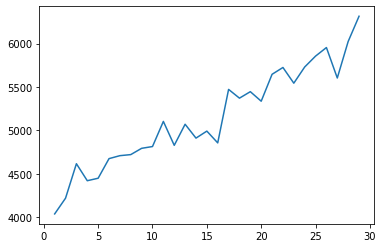

In [25]:
error = []
for k in range(1,30):
    error.append(cross_validation_onk10(k))
plt.plot(range(1,30),error)

## Conclusion:
Hence,the best K value lies between 3-5.And the best features are mostly the numeric columns.

# Question 2:
## We will be working with the census income dataset from the UCI repository and this is a classification problem for which we'll predict whether a given person has Salary > 50K or not.

In [26]:
census = pd.read_csv("adult.csv")

In [27]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


To make the dataset workable I am deleting the rows which has missing values.

In [28]:
census = census.replace(' ?',np.nan)
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
census =  census.drop(columns = ['marital-status','relationship','race','native-country','workclass'])
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   occupation      30718 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   capital-loss    32561 non-null  int64 
 8   hours-per-week  32561 non-null  int64 
 9   Salary          32561 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.5+ MB


Since Education is a very valuable  attribute in this problem I replaced the column with numeric values because in my decision tree algorithm i will take threshold to be a criteria for splitting into two nodes So placing numeric values will do the job quite nicely.

In [30]:
census['education'] = census['education'].replace(" Preschool",1)
census['education'] = census['education'].replace(" 1st-4th",5)
census['education'] = census['education'].replace(" 5th-6th",10)
census['education'] = census['education'].replace(" 7th-8th",15)
census['education'] = census['education'].replace(" 9th",20)
census['education'] = census['education'].replace(" 10th",25)
census['education'] = census['education'].replace(" 11th",30)
census['education'] = census['education'].replace(" 12th",35)
census['education'] = census['education'].replace(" HS-grad",40)
census['education'] = census['education'].replace(" Some-college",65)
census['education'] = census['education'].replace(" Bachelors",70)
census['education'] = census['education'].replace(" Masters",75)
census['education'] = census['education'].replace(" Prof-school",50)
census['education'] = census['education'].replace(" Assoc-acdm",55)
census['education'] = census['education'].replace(" Assoc-voc",60)
census['education'] = census['education'].replace(" Doctorate",80)
census['education'] = census['education'].astype(int, errors = 'raise')

On the similar lines as I did with "education" I applied the same logic for "occupation" too.

In [31]:
census.dropna(subset=['occupation'], axis=0,inplace=True)
census['occupation'] = census['occupation'].replace(" Tech-support",13)
census['occupation'] = census['occupation'].replace(" Craft-repair",3)
census['occupation'] = census['occupation'].replace(" Other-service",8)
census['occupation'] = census['occupation'].replace(" Sales",12)
census['occupation'] = census['occupation'].replace(" Exec-managerial",4)
census['occupation'] = census['occupation'].replace(" Prof-specialty",10)
census['occupation'] = census['occupation'].replace(" Handlers-cleaners",6)
census['occupation'] = census['occupation'].replace(" Machine-op-inspct",7)
census['occupation'] = census['occupation'].replace(" Adm-clerical",1)
census['occupation'] = census['occupation'].replace(" Farming-fishing",5)
census['occupation'] = census['occupation'].replace(" Transport-moving",14)
census['occupation'] = census['occupation'].replace(" Priv-house-serv",9)
census['occupation'] = census['occupation'].replace(" Protective-serv",11)
census['occupation'] = census['occupation'].replace(" Armed-Forces",2)
census['occupation'] = census['occupation'].astype(int, errors = 'raise')

Sex is a important attribute and is boolean in nature so just replaced to represent in a different way.

In [32]:
census['sex'] = census['sex'].replace(" Female",1)
census['sex'] = census['sex'].replace(" Male",0)

In below snippet I am replacing Salary column to -1 and +1 just to make it more compatible to operate on.

In [33]:
census['Salary'] = census['Salary'].replace(" <=50K",-1)
census['Salary'] = census['Salary'].replace(" >50K",1)

The Below code snippet is for a class Node which represents a node in any decision tree it has attributes such as depth which is by default assigned to 0,decision stump a tuple of size 2 in which first value represent the feature column which is used for partitioning and second value is for threshold on which we perform partition.

This code is inspired from Nisheet Sir's example but with some modifications like here we are using entropy based Information Gain criterion to split,The way I split and find threshold is a bit different I use euclidean distance based approach.

Basically here we are testing for each

In [34]:
class Node:
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def predict( self, data ):
        if self.isLeaf:
            return self.label
        else:
            if data[self.stump[0]] > self.stump[1]:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
            
    def get_Entropy(self,nPos,nNeg):
        tot = nPos+nNeg
        if tot == 0:
            return 0
        pPos = nPos/tot
        pNeg = nNeg/tot
        t1,t2 = 0,0
        if pPos > 0 :
            t1 = pPos*np.log2(pPos)
        if pNeg > 0 :   
            t2 = pNeg*np.log2(pNeg)
        ent = -(t1+t2)
        return ent
    
    def getStump( self, X, y ):
        n = y.size
        Information_gain = float('-inf')
        for i in range( X.shape[1] ):
            if self.parent is not None and i == self.parent.stump[0]:
                continue
            
            candidateThresholds = np.sort( X[:, i] )
            idx = np.argsort( X[:, i] )
            
            ySorted = y[idx]
            yCum = np.cumsum( ySorted )
            yCumRev = np.cumsum( ySorted[::-1] )[::-1]
            
            Thresh = (np.mean(X[y > 0, i]) + np.mean(X[y < 0, i]))/2
            index = 1
            
            for j in range(1,candidateThresholds.size-1):
                if(Thresh>candidateThresholds[j]):
                    index = j
                    break
            no_ofpos = int((n+sum(y))/2)
            no_ofneg = n-no_ofpos
            root_ent = self.get_Entropy(no_ofpos,no_ofneg)
            
            leftdata = index+1
            rightdata = n-leftdata
            
            pos_left = int((yCum[index]+index+1)/2)
            neg_left = index+1-pos_left
            ent_left = self.get_Entropy(pos_left,neg_left)
            
            pos_right = int((yCumRev[index+1]+n-i-1)/2)
            neg_right = n-i-1-pos_right
            ent_right = self.get_Entropy(pos_right,neg_right)
            Info_gain = root_ent - ((leftdata/n)*ent_left + (rightdata/n)*ent_right)
            
            if Info_gain > Information_gain:
                    Information_gain = Info_gain
                    bestFeat = i
                    bestThresh = Thresh
                    
        return (bestFeat, bestThresh)
    
    
    def train( self, X, y, maxLeafSize, maxDepth ):
        
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.mean( y )
        
        else:
            self.isLeaf = False
            self.stump = self.getStump( X, y )
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            
            temporary = X[:, self.stump[0]] - self.stump[1]
            
            self.left.train( X[temporary <= 0, :], y[temporary <= 0], maxLeafSize, maxDepth )
            self.right.train( X[temporary > 0, :], y[temporary > 0], maxLeafSize, maxDepth )
            

This is a Tree class which consists of a constructor and 3 class attributes and 2 methods one used to train the tree another used for predicting.

In [35]:
class Tree:
    def __init__( self, maxLeafSize = 1, maxDepth = 20 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, data ):
        return self.root.predict( np.array( data.to_numpy() ) )
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

Below Code is about a function defination which on given a dataset and a ratio it divides and returns the dataset after splitting according to that ratio .

In [36]:
def split_training_set(data,test_ratio):
    permuted = np.random.permutation(len(data))
    testsize = int(len(data)*test_ratio)
    trainsize = len(data)-testsize
    trainindexs = permuted[:trainsize]
    testindexs = permuted[trainsize:]
    return data.iloc[trainindexs],data.iloc[testindexs]

## 2 a)
In the following snippet of code we are splitting the census dataset into training set and validation set then makes a Decision tree for it, trains the tree on the training dataset.
Note: This might give some warning can't able to figure out these so ignore for now.

In [44]:
T1,T2 = split_training_set(census,0.3)
training = T1.drop("Salary",axis=1)
train_labels = T1["Salary"].copy()
DT = Tree( maxLeafSize = 10, maxDepth = 15 )
DT.train(training.to_numpy(),train_labels.to_numpy())
test = T2.drop("Salary",axis=1)
test_labels = T2["Salary"].copy()
predicted = []
for i in range(len(test)):
    predicted.append(DT.predict(test.iloc[i]))

Following code will just check how many predictions hits the validation set.

In [38]:
x = test_labels.to_numpy()
count = 0
for i in range(len(predicted)):
    if (predicted[i]<0 and x[i]<0) or (predicted[i]>=0 and x[i]>0):
        count+=1
print("The accuracy in terms of percentage was "+str(count/len(x)*100))

The accuracy in terms of percentage was 77.47151383613672


## 2b) Validation part:
below function defination takes a dataset input and divides it 5 times into validation and training and calculates the mean accuracy for given hyperparameter level and leafsize.

In [39]:
def cross_Validate(data,level,leafsize):
    accuracy = []
    for index in range(1,5):
        T1,T2 = split_training_set(data,0.3)
        training = T1.drop("Salary",axis=1)
        train_labels = T1["Salary"].copy()
        DT = Tree( maxLeafSize = leafsize, maxDepth = level )
        DT.train(training.to_numpy(),train_labels.to_numpy())
        test = T2.drop("Salary",axis=1)
        test_labels = T2["Salary"].copy()
        predicted = []
        for i in range(len(test)):
            predicted.append(DT.predict(test.iloc[i]))
        count = 0

        for i in range(len(predicted)):
            if (predicted[i]<0 and x[i]<0) or (predicted[i]>=0 and x[i]>0):
                count+=1 
        accuracy.append(count/len(predicted)*100)
    return np.mean(accuracy)

Below Function will take a dataset as input and returns the optimal Hyperparameter values those are maximum level and maximum leafsize.

In [40]:
def optimal_param(data):
    optimal_leaf = 5
    optimal_level = 5
    objective = -9999
    for leaf in range(15,20):
        for level in range(3,10):
            temp = cross_Validate(data,level,leaf)
            if temp > objective:
                objective  = temp
                optimal_leaf = leaf
                optimal_level = level
    return leaf,level

The following function splits the census data in two parts validation set and training set then by try learning best hyperparameter values using the above function on the training set then trains the tree using the training set and best Hyperparameter values and then reports by testing it on the validation set.

In [41]:
def traintobestandValidate():
    T1,T2 = split_training_set(census,0.3)
    bestleaf,bestlevel = optimal_param(T1)
    training = T1.drop("Salary",axis=1)
    train_labels = T1["Salary"].copy()
    DT = Tree( maxLeafSize = bestleaf, maxDepth = bestlevel )
    DT.train(training.to_numpy(),train_labels.to_numpy())
    test = T2.drop("Salary",axis=1)
    test_labels = T2["Salary"].copy()
    predicted = []
    for i in range(len(test)):
        predicted.append(DT.predict(test.iloc[i]))
    count = 0

    for i in range(len(predicted)):
        if (predicted[i]<0 and x[i]<0) or (predicted[i]>=0 and x[i]>0):
            count+=1 
    print("Best possible accuracy is "+str((count/len(predicted))*100))

The Below is just the function calling for to the above function and printing the best possible accuracy on average if we learn the parameters using the training part of the training set only and then verifying it with validation set.

In [43]:
traintobestandValidate()

Best possible accuracy is 71.11231687466088
